In [16]:
#Importing necessary libraries
import pandas as pd


from baybe import Campaign
from baybe.objective import Objective
from baybe.parameters import NumericalDiscreteParameter, CategoricalParameter, NumericalContinuousParameter
from baybe.searchspace import SearchSpace, SubspaceDiscrete, SubspaceContinuous
from baybe.targets import NumericalTarget

from baybe.recommenders import RandomRecommender, SequentialGreedyRecommender, FPSRecommender
from baybe.strategies import TwoPhaseStrategy
from baybe.surrogates import (
    BayesianLinearSurrogate,
    GaussianProcessSurrogate,
    NGBoostSurrogate,
    RandomForestSurrogate,
)

In [17]:
#Encoding method 1
df_orig = pd.read_excel(r'xrd_new.xlsx', sheet_name='Sheet6')
df_orig = df_orig.drop(['Isc','schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6'], axis=1)

In [18]:
numerical_df = df_orig.drop(['FF', "DROP"], axis=1)
categorical_df = df_orig[["DROP"]]
target_df = df_orig[["FF"]]

In [19]:
df = pd.concat([numerical_df, categorical_df], axis=1)
df.head()

,FWHM 1,FWHM 2,FWHM 3,FWHM 4,FWHM 5,FWHM 6,2-theta 1,2-theta 2,2-theta 3,2-theta 4,...,Intensity 4,Intensity 5,Intensity 6,relative_intensity 1,relative_intensity 2,relative_intensity 3,relative_intensity 4,relative_intensity 5,relative_intensity 6,DROP
0,0.45,0.35,0.51,0.57,0.54,0.925902,32.25,34.9,36.86,48.29,...,0.15,0.3,0.18,64.1,51.28,100.0,19.23,38.46,23.07,1
1,0.45,0.35,0.51,0.57,0.54,0.925902,32.25,34.9,36.86,48.29,...,0.15,0.3,0.18,64.1,51.28,100.0,19.23,38.46,23.07,2
2,0.45,0.35,0.51,0.57,0.54,0.925902,32.25,34.9,36.86,48.29,...,0.15,0.3,0.18,64.1,51.28,100.0,19.23,38.46,23.07,3
3,0.45,0.35,0.51,0.57,0.54,0.925902,32.25,34.9,36.86,48.29,...,0.15,0.3,0.18,64.1,51.28,100.0,19.23,38.46,23.07,4
4,0.45,0.35,0.51,0.57,0.54,0.925902,32.25,34.9,36.86,48.29,...,0.15,0.3,0.18,64.1,51.28,100.0,19.23,38.46,23.07,5


In [20]:
ALLOW_REPEATED_RECOMMENDATIONS = True
ALLOW_RECOMMENDING_ALREADY_MEASURED = True

initial_recommenders = [
    "Random",  #: RandomRecommender(),
    "Farthest Point Sampling",  # FPSRecommender(),
    "KMEANS Clustering",  # KMeansClusteringRecommender(),
]
INITIAL_RECOMMENDER = FPSRecommender()

available_surrogate_models = [
    GaussianProcessSurrogate(),
    RandomForestSurrogate(),
    NGBoostSurrogate(),
    BayesianLinearSurrogate(),
]

SURROGATE_MODEL = GaussianProcessSurrogate()


available_acq_functions = [
    "qPI",  # q-Probability Of Improvement
    "qEI",  # q-Expected Improvement
    "qUCB",  # q-upper confidence bound with beta of 1.0
    "PM",  # Posterior Mean,
    "PI",  # Probability Of Improvement,
    "EI",  # Expected Improvement,
    "UCB",  # upper confidence bound with beta of 1.0
]

ACQ_FUNCTION = "qEI"

target = NumericalTarget(
    name="FF",
    mode="MAX",
)
objective = Objective(mode="SINGLE", targets=[target])

parameters = []

for numerical_col in numerical_df.columns:
    parameters.append(NumericalDiscreteParameter(
                                                name=numerical_col,
                                                values=tuple(set(df[numerical_col])),
                                                ))
for categorical_col in categorical_df.columns:
    parameters.append(CategoricalParameter(
                                        name=categorical_col,
                                        values=tuple(set(df[categorical_col])),
                                        encoding="INT",
                                        ))

strategy = TwoPhaseStrategy(
    initial_recommender=INITIAL_RECOMMENDER,
    recommender=SequentialGreedyRecommender(
        surrogate_model=SURROGATE_MODEL, acquisition_function_cls=ACQ_FUNCTION
    ),
    allow_repeated_recommendations=ALLOW_REPEATED_RECOMMENDATIONS,
    allow_recommending_already_measured=ALLOW_RECOMMENDING_ALREADY_MEASURED,
)

searchspace = SearchSpace(discrete=SubspaceDiscrete.from_dataframe(df, parameters))
campaign = Campaign(searchspace=searchspace, objective=objective, strategy=strategy)

In [21]:
df["FF"] = target_df
campaign.add_measurements(df)

In [22]:
campaign.recommend(batch_quantity=3)

c:\Users\majmo\Git\ml_demystified\venv\lib\site-packages\botorch\acquisition\monte_carlo.py:396: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.register_buffer("best_f", torch.as_tensor(best_f, dtype=float))


,FWHM 1,FWHM 2,FWHM 3,FWHM 4,FWHM 5,FWHM 6,2-theta 1,2-theta 2,2-theta 3,2-theta 4,...,Intensity 5,Intensity 6,relative_intensity 1,relative_intensity 2,relative_intensity 3,relative_intensity 4,relative_intensity 5,relative_intensity 6,DROP,FF
index,,,,,,,,,,,,,,,,,,,,,
20,0.45,0.39,0.52,0.73,0.74,0.76,32.12,34.84,36.69,48.22,...,0.29,0.15,78.65,38.2,100.00,14.60,32.58,16.85,6,47.480937
21,0.19,0.17,0.23,0.24,0.36,0.25,32.12,34.90,36.72,48.16,...,0.10,0.15,100.00,62.1,78.94,13.68,10.52,15.78,1,46.087990
26,0.19,0.17,0.23,0.24,0.36,0.25,32.12,34.90,36.72,48.16,...,0.10,0.15,100.00,62.1,78.94,13.68,10.52,15.78,6,45.096147


In [25]:
initial_data = [df.sample(n=6), df.sample(n=6), df.sample(n=6)]
N_DOE_ITERATIONS = 20

from baybe.simulation import simulate_scenarios
scenarios = {"Random": campaign}
results = simulate_scenarios(
    scenarios,
    df,
    batch_quantity=3,
    n_doe_iterations=N_DOE_ITERATIONS,
    initial_data=initial_data,
)

  0%|          | 0/3 [00:00<?, ?it/s]c:\Users\majmo\Git\ml_demystified\venv\lib\site-packages\botorch\acquisition\monte_carlo.py:396: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.register_buffer("best_f", torch.as_tensor(best_f, dtype=float))
c:\Users\majmo\Git\ml_demystified\venv\lib\site-packages\botorch\acquisition\monte_carlo.py:396: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.register_buffer("best_f", torch.as_tensor(best_f, dtype=float))
c:\Users\majmo\Git\ml_demystified\venv\lib\site-packages\botorch\acquisition\monte_carlo.py:396: FutureWarning: Series.__getitem__ treating keys as positions is de

In [26]:
results

,Scenario,Random_Seed,Initial_Data,Iteration,Num_Experiments,FF_Measurements,FF_IterBest,FF_CumBest
0,Random,1337,0,0,3,"[47.48093653, 46.08798975672214, 45.0961472754...",47.480937,47.480937
1,Random,1337,0,1,6,"[44.77310924, 47.48093653, 46.08798975672214]",47.480937,47.480937
2,Random,1337,0,2,9,"[47.48093653, 46.08798975672214, 45.0961472754...",47.480937,47.480937
3,Random,1337,0,3,12,"[43.53322314, 47.48093653, 46.08798975672214]",47.480937,47.480937
4,Random,1337,0,4,15,"[47.48093653, 46.08798975672214, 45.0961472754...",47.480937,47.480937
5,Random,1337,0,5,18,"[44.77310924, 47.48093653, 46.08798975672214]",47.480937,47.480937
6,Random,1337,0,6,21,"[47.48093653, 46.08798975672214, 45.0961472754...",47.480937,47.480937
7,Random,1337,0,7,24,"[44.09025708926404, 47.48093653, 46.0879897567...",47.480937,47.480937
8,Random,1337,0,8,27,"[43.53322314, 47.48093653, 46.08798975672214]",47.480937,47.480937
9,Random,1337,0,9,30,"[44.77310924, 47.48093653, 46.08798975672214]",47.480937,47.480937


c:\Users\majmo\Git\ml_demystified\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\majmo\Git\ml_demystified\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\majmo\Git\ml_demystified\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\majmo\Git\ml_demystified\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

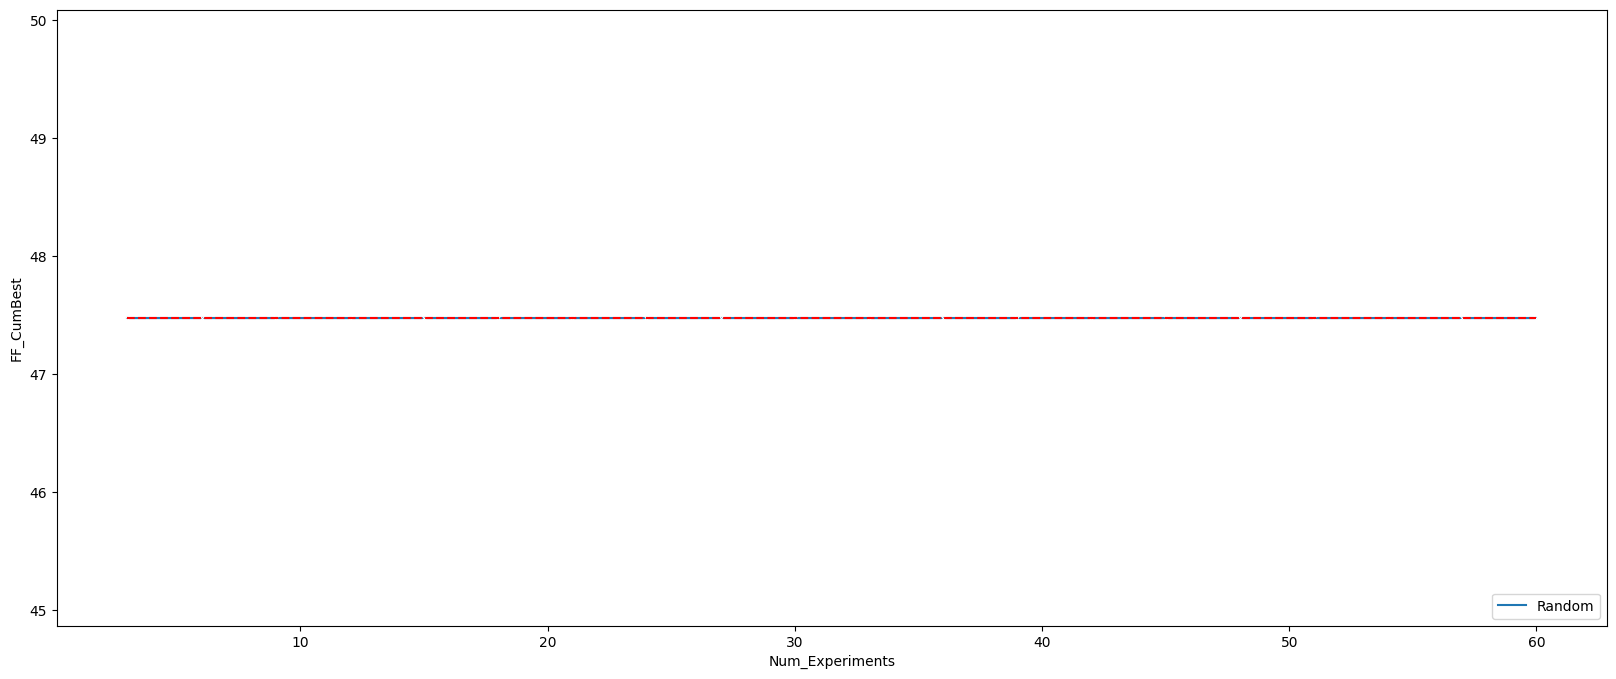

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

max_ff = df["FF"].max()
sns.lineplot(
    data=results, x="Num_Experiments", y="FF_CumBest", hue="Scenario", marker="x"
)
plt.plot([3, 3 * N_DOE_ITERATIONS], [max_ff, max_ff], "--r")
plt.legend(loc="lower right")
plt.gcf().set_size_inches(20, 8)
plt.savefig("./run_full_initial_data.png")